In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## EDA

In [43]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Based on this dataset, I aim to conduct the following analysis:

1. Perform Exploratory Data Analysis (EDA) to understand the dataset's structure and distribution. 
2. Handle missing values(if any) appropriately to maintain data integrity. 
3. Identify and remove outliers to improve data quality and model performance. 
4. Perform feature engineering to create new meaningful variables if necessary. 
5. Analyze correlations between variables to identify relationships and dependencies.

In [44]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [45]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [46]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [47]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [48]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

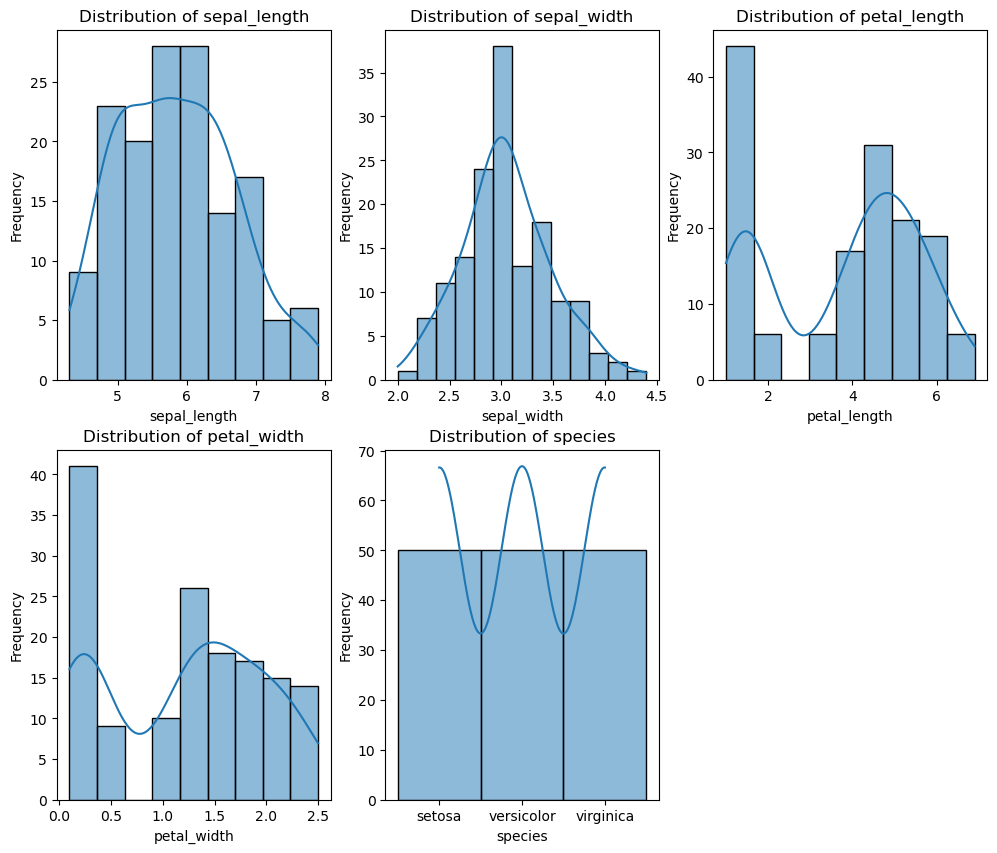

In [49]:
fig, axes = plt.subplots(2, 3, figsize=(12, 10))  # 创建 2x3 子图布局
axes = axes.flatten()  # 将2D数组展平为1D，方便索引

for i, column in enumerate(iris.columns):
    sns.histplot(iris[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Delete extra blank plot
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j]) 

<Axes: >

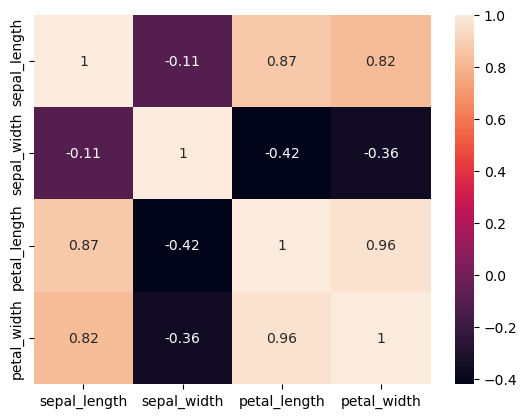

In [50]:
#Correlation heatmap: 
numeric_columns = iris.select_dtypes(include=['number']) 
sns.heatmap(numeric_columns.corr(), annot=True)

In [51]:
import numpy as np

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  
    Q3 = df[column].quantile(0.75)  
    IQR = Q3 - Q1  # 四分位距
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Find outliers
outliers = detect_outliers_iqr(iris, "sepal_width")
print(outliers)

# What to do with outliers?

    sepal_length  sepal_width  petal_length  petal_width     species
15           5.7          4.4           1.5          0.4      setosa
32           5.2          4.1           1.5          0.1      setosa
33           5.5          4.2           1.4          0.2      setosa
60           5.0          2.0           3.5          1.0  versicolor


# ANOVA test

In [54]:
from scipy.stats import f_oneway


numeric_columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']


for column in numeric_columns:
    grouped_data = [iris[iris['species'] == cat][column] for cat in iris['species'].unique()]
    f_stat, p_value = f_oneway(*grouped_data)
    
    print(f"ANOVA for {column}:")
    print(f"   F-statistic: {f_stat:.3f}")
    print(f"   P-value: {p_value:.5f}\n")



ANOVA for sepal_length:
   F-statistic: 119.265
   P-value: 0.00000

ANOVA for sepal_width:
   F-statistic: 47.364
   P-value: 0.00000

ANOVA for petal_length:
   F-statistic: 1179.034
   P-value: 0.00000

ANOVA for petal_width:
   F-statistic: 959.324
   P-value: 0.00000

